## <center>**Analisis exploratorio de los Datos**</center>
## <center>**EDA**</center>



En el presente documento se llevará a cabo todo el procedimiento de análisis exploratorio de los datos con el fin de entender mejor el problema en base a los datos proporcionados y de generar hallazgos que puedan contribuir con el objetivo de minimizar el número de personas fallecidas en accidentes de tránsito.

Importacion de librerias Necesarias

In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

* lectura de los archivos:

In [4]:
hechos = pd.read_excel("./Datasets/homicidios.xlsx",sheet_name = "HECHOS")

In [5]:
hechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


# Analisis de datos nulos #
***los valores faltantes pueden afectar la integridad y la interpretación de los resultados***

In [6]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

podemos observar que en este caso los unicos datos nulos estan relacionados a direcciones donde no aplica altura o cruce, o simplemente desconocemos completamente el lugar del accidente

In [8]:
hechos['Dirección Normalizada'].describe()

count                                  688
unique                                 635
top       27 DE FEBRERO AV. y ESCALADA AV.
freq                                     5
Name: Dirección Normalizada, dtype: object

In [26]:

hechos[['Dirección Normalizada', 'Calle']].head(3)


,Dirección Normalizada,Calle
0,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",PIEDRA BUENA AV.
1,"PAZ, GRAL. AV. y DE LOS CORRALES AV.","PAZ, GRAL. AV."
2,ENTRE RIOS AV. 2034,ENTRE RIOS AV.


In [25]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

*Con el fin de detectar la frecuencia de texto de manera grafica podemos revisar en las direcciones normalizadas que palabras tienen mayor insidencia y seguramente detectar las vias mas peligrosas de la ciudad

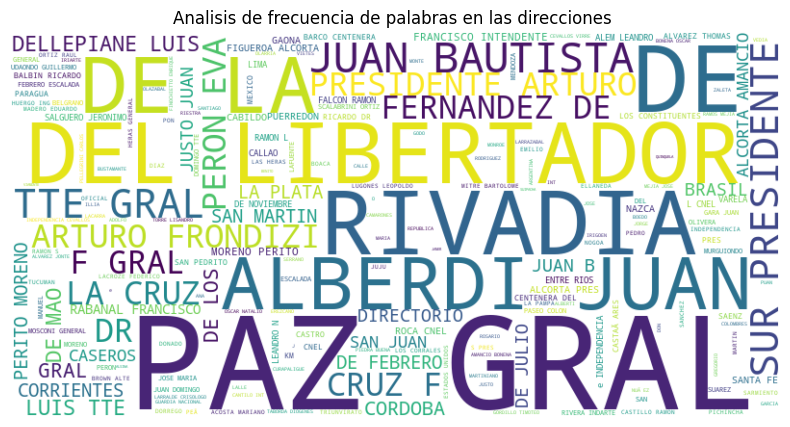

In [30]:
from wordcloud import WordCloud

# Unir todas las direcciones en un solo texto
texto_direcciones = ' '.join(hechos['Dirección Normalizada'].dropna())


# Reemplazo las palabras que no aportan nada al analisis
texto_direcciones = texto_direcciones.replace("AV", "")
texto_direcciones = texto_direcciones.replace("y", "")
texto_direcciones = texto_direcciones.replace("Y", "")
texto_direcciones = texto_direcciones.replace("AUTOPISTA", "")



# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_direcciones)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Analisis de frecuencia de palabras en las direcciones ')
plt.show()


Podemos observar que las avenidas más peligrosas son Gral. Paz, Rivadavia, Alberdi, Juan, y Libertador. Probablemente, estas calles son de gran envergadura y atraviesan una parte significativa de la ciudad.

array([[<Axes: title={'center': 'N_VICTIMAS'}>,
        <Axes: title={'center': 'FECHA'}>,
        <Axes: title={'center': 'AAAA'}>],
       [<Axes: title={'center': 'MM'}>, <Axes: title={'center': 'DD'}>,
        <Axes: title={'center': 'Altura'}>],
       [<Axes: title={'center': 'COMUNA'}>, <Axes: >, <Axes: >]],
      dtype=object)

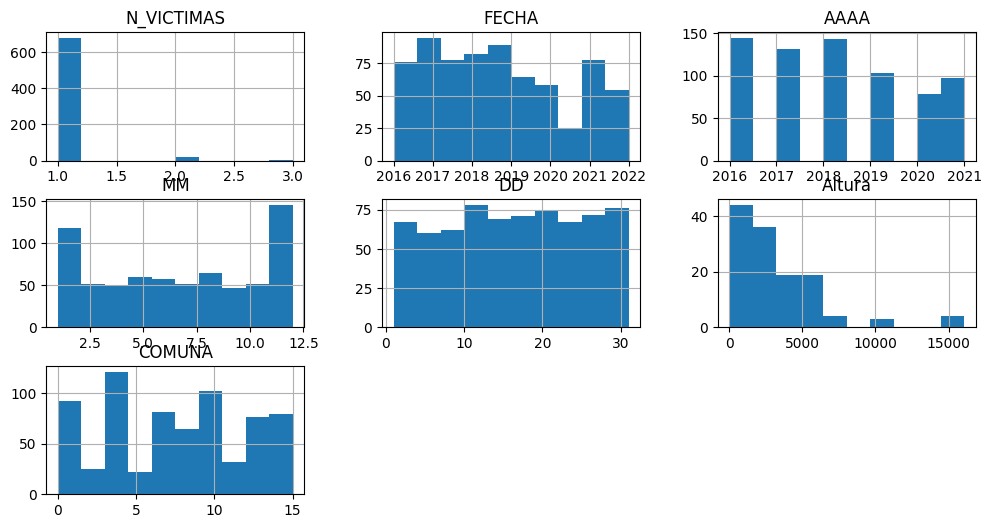

In [31]:
hechos.hist(figsize=(12,6))

Del anterior grafico lo que mas llamo mi atencion es que la gran mayoria de accidentes dejan solo una victima fatal, no hay casos registrados para mas de una victima

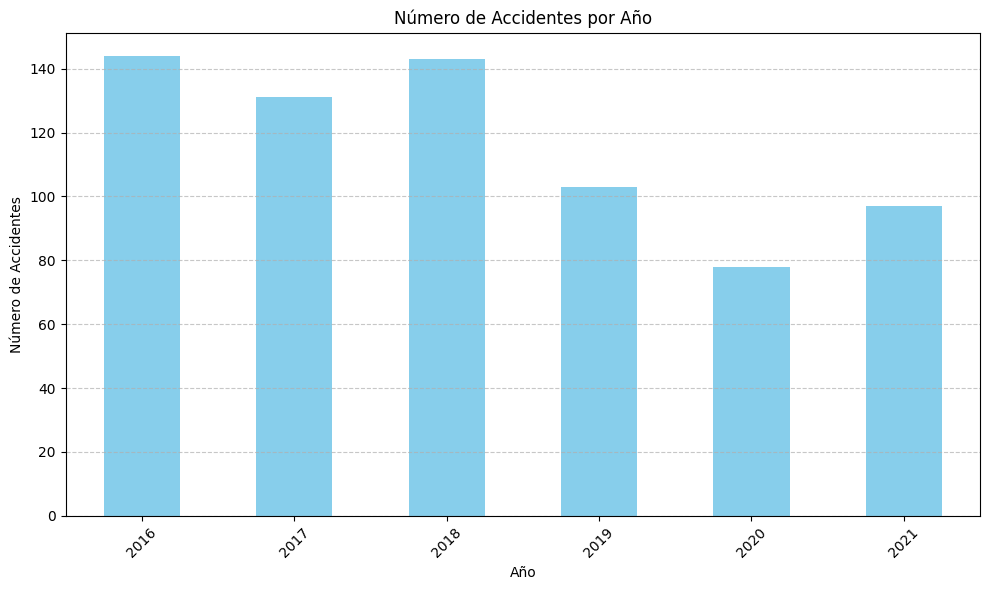

In [35]:
# Analisis del comportamiento de muertes por año
# Contar el número de accidentes por tipo de calle
accidentes_por_año = hechos['AAAA'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_año.plot(kind='bar', color='skyblue')
plt.title('Número de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos observar que hay una tendencia a la disminucion en numero de muertes desde el 2016 hasta 2021, si bien el pico mas bajo se alcanzo en el 2020 es muy probable que este relacionado con el Covid 19 que estuvo con mas furor en ese año.

In [36]:
accidentes_por_año

AAAA
2016    144
2017    131
2018    143
2019    103
2020     78
2021     97
Name: count, dtype: int64

In [40]:
hechos['pos x'] = pd.to_numeric(hechos['pos x'], errors='coerce')
hechos['pos y'] = pd.to_numeric(hechos['pos y'], errors='coerce')
hechos = hechos.dropna(subset=['pos x', 'pos y'])
mapa = folium.Map(location=[hechos['pos y'].iloc[100], hechos['pos x'].iloc[100]], zoom_start=12)

# marcadores
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in hechos.iterrows():
        folium.Marker([row['pos y'], row['pos x']],
                      popup=f"ID:  {row['VICTIMA']}",
                      icon=folium.Icon(color='red')).add_to(marker_cluster)
mapa


La gráfica anterior representa el punto central al que se atribuye la mayoría de los accidentes. Es interesante destacar que a medida que nos acercamos al mar, la densidad de accidentes tiende a aumentar. Esta tendencia probablemente está relacionada con el flujo de mercancías que entran por los puertos y la gran cantidad de transporte de mercancías que se realiza desde estas áreas.

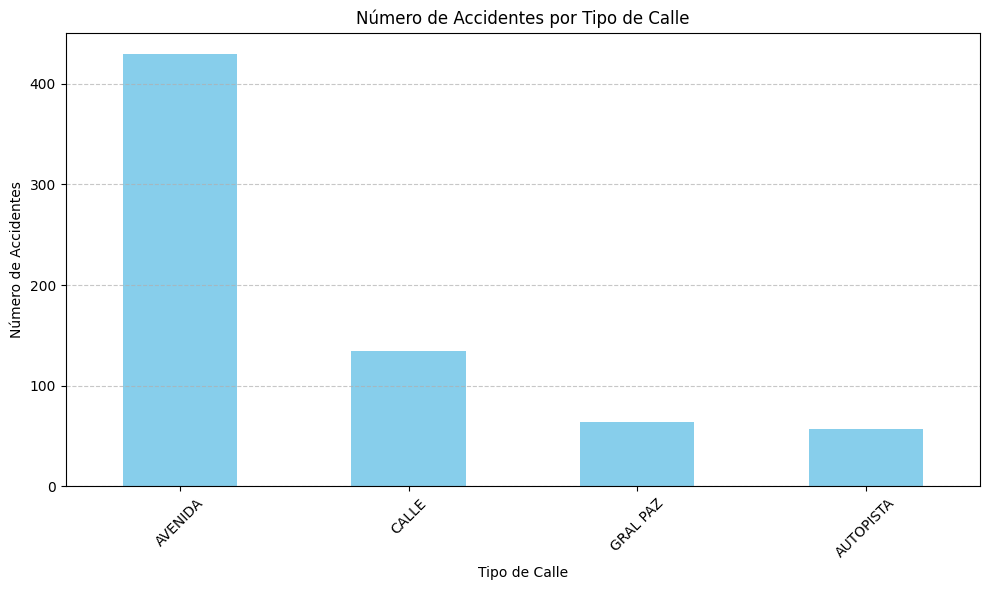

In [41]:
# Contar el número de accidentes por tipo de calle
accidentes_por_tipo_calle = hechos['TIPO_DE_CALLE'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_tipo_calle.plot(kind='bar', color='skyblue')
plt.title('Número de Accidentes por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Teniendo en cuenta que las avenidas se diferencian de las autopistas por el contacto con zonas residenciales, esto promueve la tesis que afirma que los siniestros pueden estar afectados por el flujo de mercancía que entra y sale de la ciudad. La avenida Gral. Paz es de especial cuidado

# Deteccion de OUTLIERS #

La idea es encontrar registros que se desvian significativamente del resto de datos, para lograr esto podriamos utilizar la tecnica del boxplot 

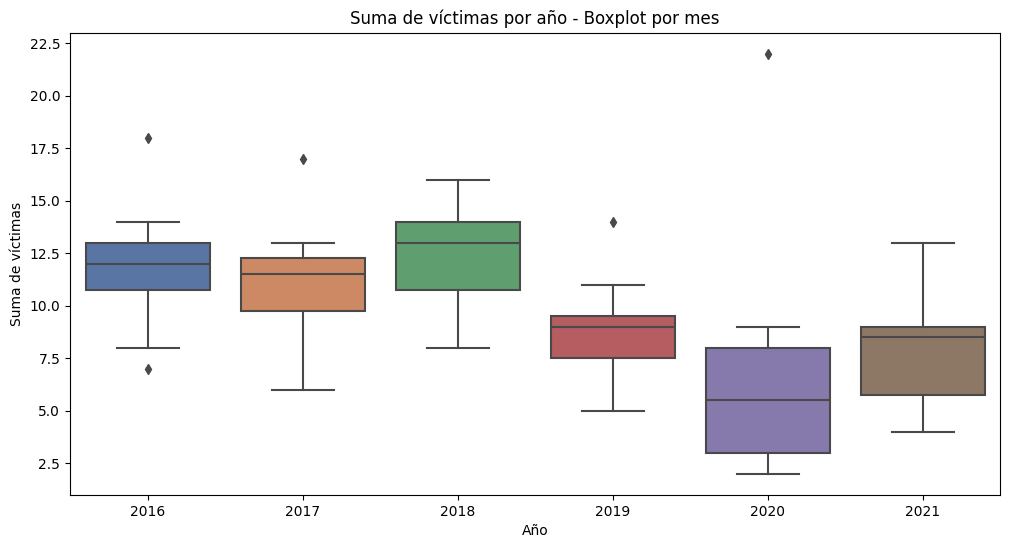

In [43]:
# Configuré la paleta de colores
sns.set_palette("deep")

# Calculé la suma de víctimas por año y mes
sumaVictimas = hechos.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

# Configuré el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusté el tamaño según fue necesario

# Creé el gráfico de caja y bigotes para cada año
sns.boxplot(x='AAAA', y='N_VICTIMAS', data=sumaVictimas)

# Añadí etiquetas para outliers
for año, datos in sumaVictimas.groupby('AAAA'):
    Q1 = datos['N_VICTIMAS'].quantile(0.25)
    Q3 = datos['N_VICTIMAS'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos[(datos['N_VICTIMAS'] < Q1 - 1.5 * IQR) | (datos['N_VICTIMAS'] > Q3 + 1.5 * IQR)]
    for i, fila in outliers.iterrows():
        plt.annotate(f"{fila['N_VICTIMAS']}", xy=(fila['AAAA'], fila['N_VICTIMAS']), xytext=(-15, 10), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

# Puse título y etiquetas de ejes
plt.title('Suma de víctimas por año - Boxplot por mes')
plt.xlabel('Año')
plt.ylabel('Suma de víctimas')

# Mostré el gráfico
plt.show()

el Año 2020 a pesar de ser el año con menos accidentes fatales, tiene un mes que se lleva por mucho el pico mas alto de accidentes.

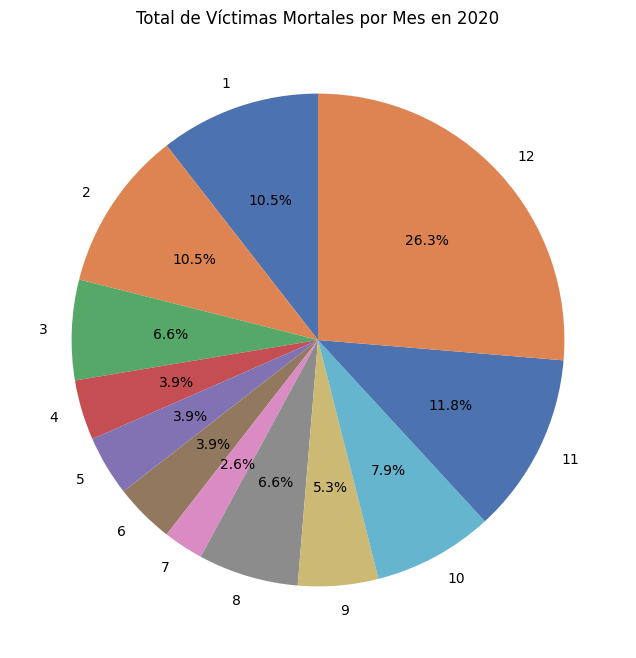

In [46]:
# Filtrar las víctimas mortales y agrupar por mes para obtener el total de víctimas mortales por mes
total_victimas_por_mes = hechos[hechos['AAAA'] == 2020].groupby('MM').size()

# Crear el gráfico de tortas
plt.figure(figsize=(8, 8))
total_victimas_por_mes.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total de Víctimas Mortales por Mes en 2020')
plt.ylabel('')
plt.show()

Durante diciembre, especialmente hacia fin de mes, es común que aumente el tráfico  debido a las festividades de fin de año, compras navideñas etc y el aumento de personas que viajan para visitar a familiares y amigos que seguramente no se veian por la pandemia.